In [1]:
from preprocessing import *
from model_train_predict import *
from utils import *

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot

import warnings
warnings.filterwarnings("ignore")

In [2]:
ticker = 'SEV' # Samsung
number = 1000

df, data = load_data(ticker=ticker, number=number)
print(len(df))

df = df.copy()[:100]

Data saved to : stock_market_data-SEV_2020-12-14.csv
1000


# 1. Exploratory Data Analys (EDA)

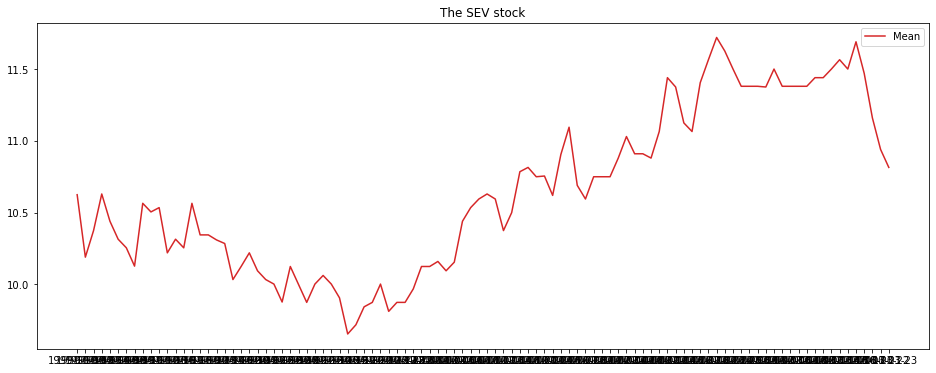

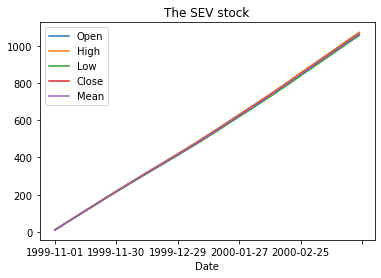

Dickey-Fuller test results

Test Statistic    -1.403127
p-value            0.580776
# of lags          0.000000
# of obs          99.000000
dtype: float64
Critical value at 1%: -3.49820
Critical value at 5%: -2.89121
Critical value at 10%: -2.58260


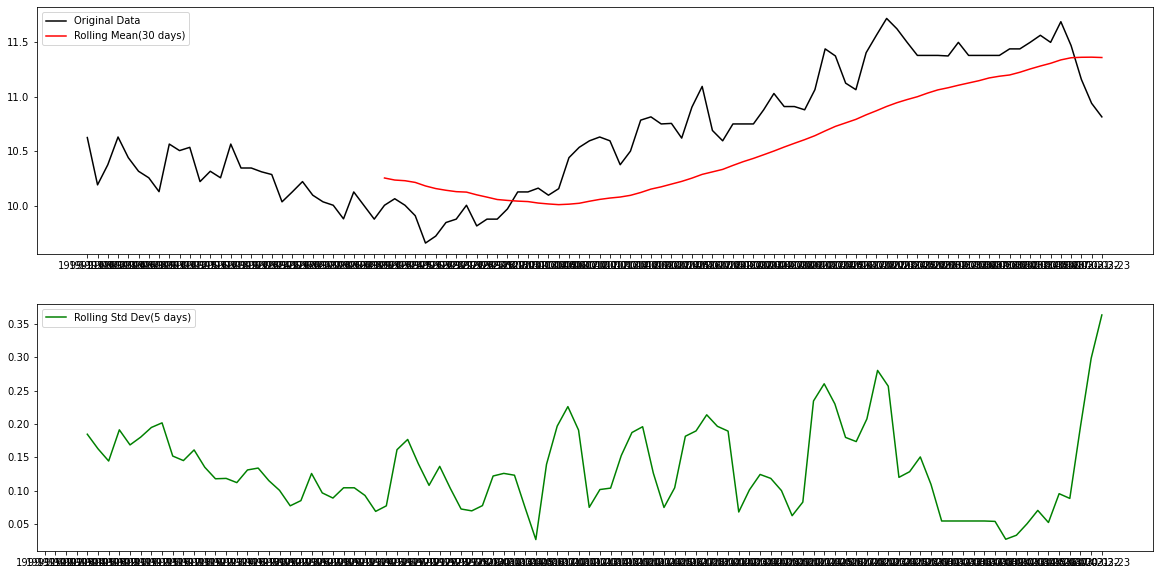

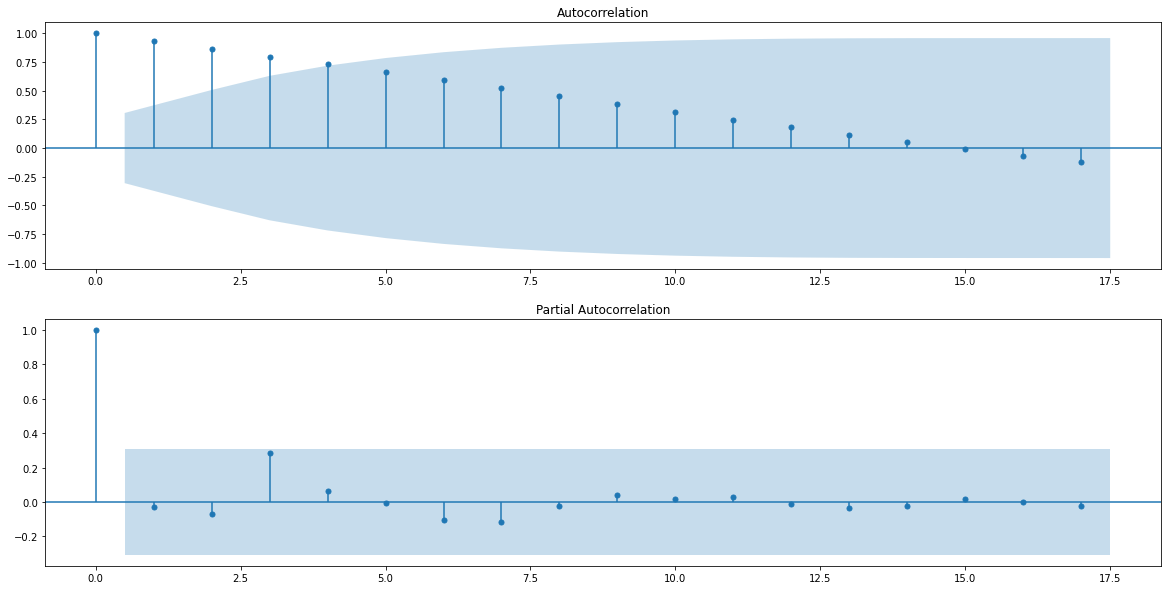

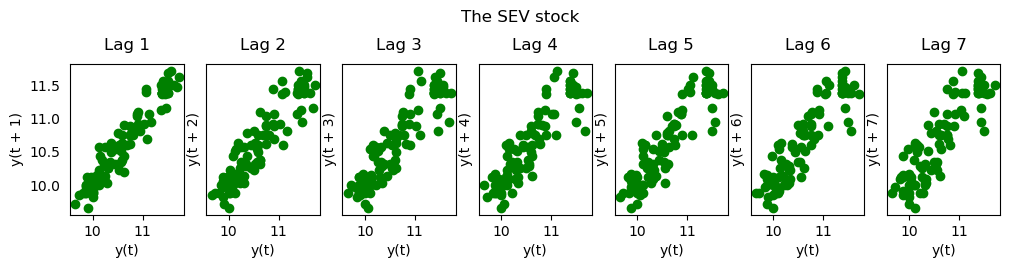

In [3]:
# overview data
plt.figure(figsize=(16,6))
plt.plot(df.Mean, label = "Mean" , color='tab:red')
plt.title(f'The {ticker} stock')
plt.legend(loc='best')
plt.show()

# Draw comulative plot
plot_cumsum(df, ticker)

# check stationarity
check_stationarity(df.Mean)

# Tính Autocorrection and Partial Autocorrection
autocorrelation_partialAutocorrection(df)

# Dùng lag_plot để view autocorrelation
autocorrelation(df, ticker)

## => timeStep = 4 + 1 = 5 (lấy 4 điểm trong quá khứ để dự đoán tương lai)

# 2. Setup general params 

## 2.1 search params for ARIMA

In [4]:
n = int(0.7 * len(data))

data_train = data[:n]
data_test = data[n:]

print(f'The shape of the data_train is {data_train.shape}')
print(f'The shape of the data_test is {data_test.shape}')

n = int(0.1 * len(data))
order = ARIMA_search_params(data[:n])

The shape of the data_train is (700, 1)
The shape of the data_test is (300, 1)
ARIMA(0, 0, 0) RMSE=0.864
ARIMA(0, 0, 1) RMSE=0.498
ARIMA(0, 0, 2) RMSE=0.330
ARIMA(0, 1, 0) RMSE=0.153
ARIMA(0, 1, 1) RMSE=0.169
ARIMA(0, 1, 2) RMSE=0.161
ARIMA(0, 2, 0) RMSE=0.180
ARIMA(0, 2, 1) RMSE=0.155
ARIMA(0, 2, 2) RMSE=0.173
ARIMA(1, 0, 0) RMSE=0.162
ARIMA(1, 0, 1) RMSE=0.171
ARIMA(1, 0, 2) RMSE=0.164
ARIMA(1, 1, 0) RMSE=0.159
ARIMA(1, 1, 1) RMSE=0.162
ARIMA(1, 1, 2) RMSE=0.160
ARIMA(1, 2, 0) RMSE=0.183
ARIMA(1, 2, 1) RMSE=0.160
ARIMA(1, 2, 2) RMSE=0.157
ARIMA(2, 0, 0) RMSE=0.165
ARIMA(2, 0, 1) RMSE=0.164
ARIMA(2, 0, 2) RMSE=0.201
ARIMA(2, 1, 0) RMSE=0.160
ARIMA(2, 1, 1) RMSE=0.163
ARIMA(2, 1, 2) RMSE=0.168
ARIMA(2, 2, 0) RMSE=0.180
ARIMA(2, 2, 1) RMSE=0.162
ARIMA(2, 2, 2) RMSE=0.161
Best ARIMA(0, 1, 0) RMSE=0.153


## 2.2. model params

In [5]:
timeStep=5
epochs = 500

# 3. Build models

## 3.1. ARIMA model

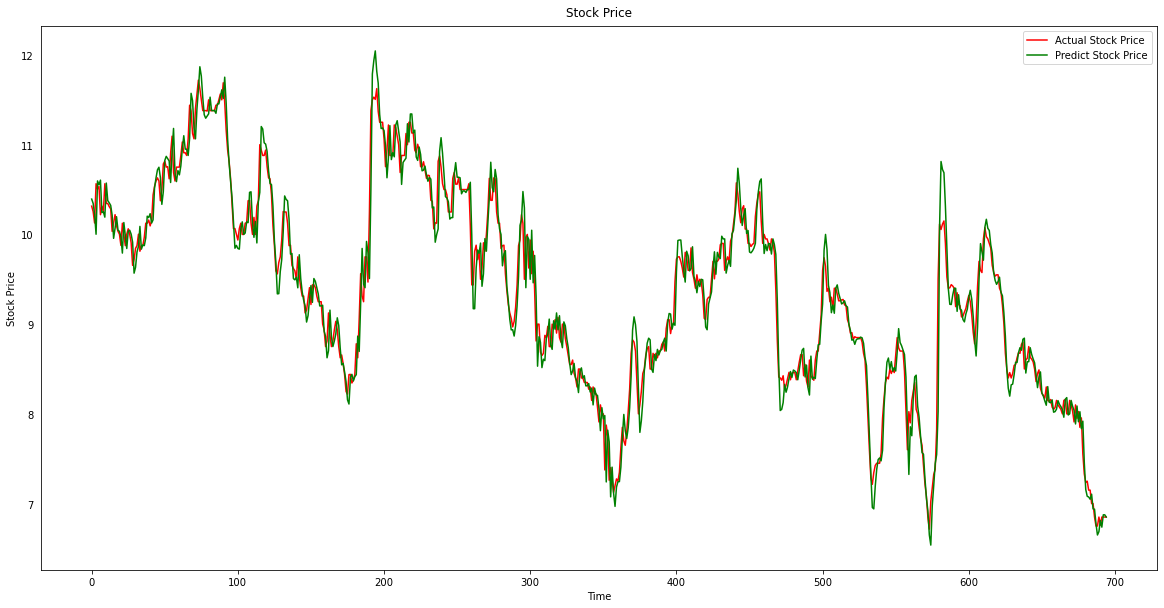

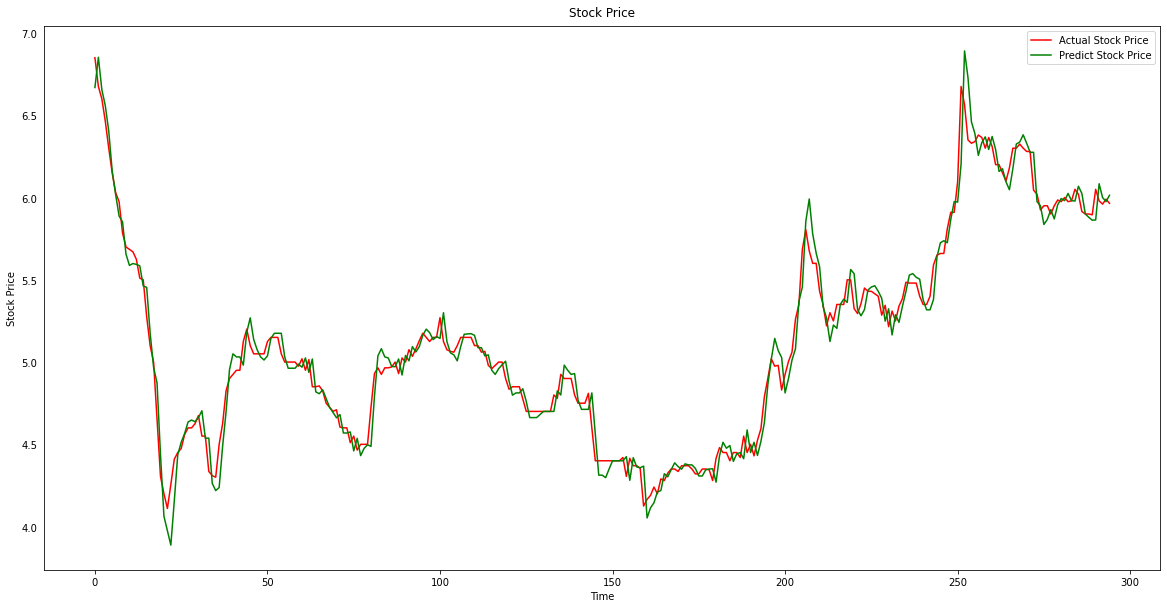

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 0.2134, 0.1548
RMSE_test, MAE_test = 0.1001, 0.0727

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5548
Precision  according to the trend: 0.6383
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5
Precision  according to the trend: 0.6306


In [6]:
# predict
y_train, y_train_pred = ARIMA_single(data_train, timeStep=timeStep, order=order)

y_test, y_test_pred = ARIMA_single(data_test, timeStep=timeStep, order=order)

# plot graph
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)


print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.2. LSTM model

 0.0018
Epoch 305/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 306/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 307/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 308/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 309/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 310/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 311/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 312/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 313/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 314/500
18/18 [==============================] - 0s 12ms/step - loss

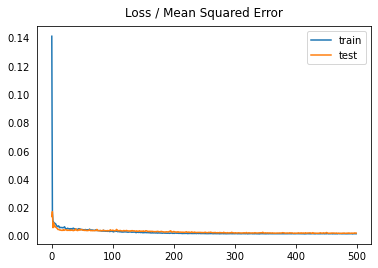

In [7]:
# train
model_lstm, hist_lstm, sc = LSTM_model(data_train, epochs=epochs, timeStep=timeStep)

plot_history(hist_lstm)

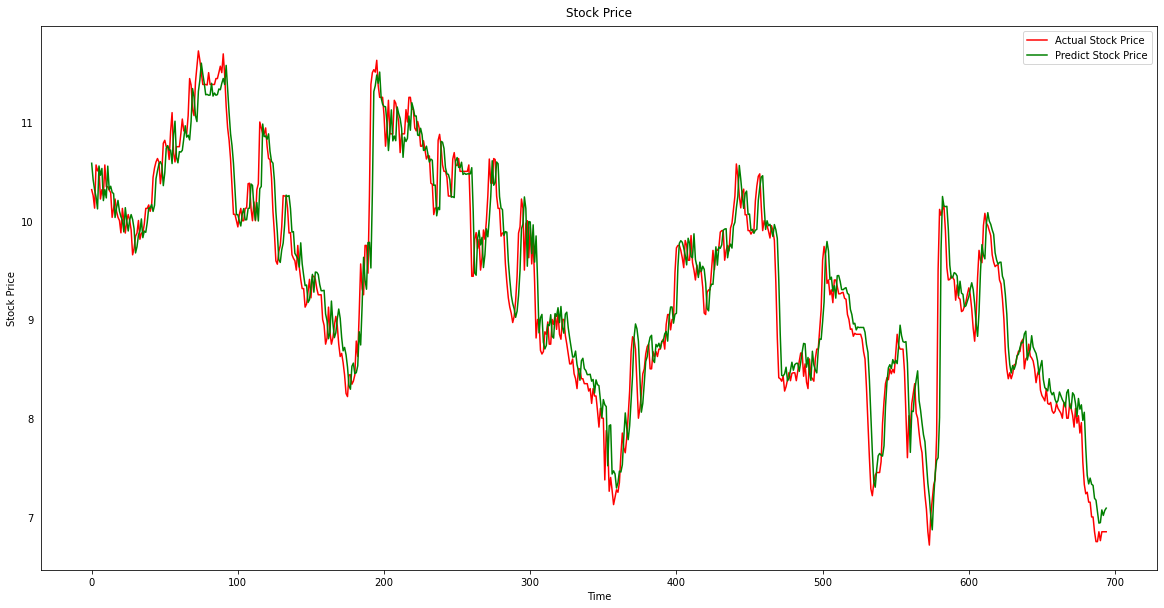

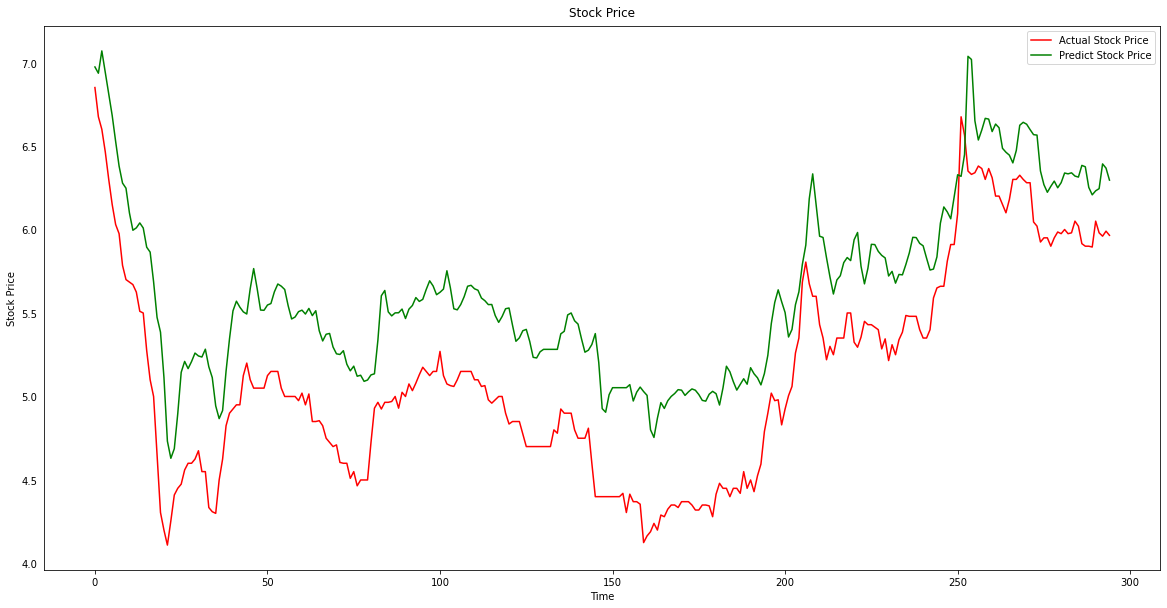

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 0.3022, 0.2158
RMSE_test, MAE_test = 0.5326, 0.5077

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5202
Precision  according to the trend: 0.6064
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.568
Precision  according to the trend: 0.6943


In [8]:
y_train, y_train_pred = LSTM_predict(model_lstm, data_train, sc, timeStep=timeStep)

y_test, y_test_pred = LSTM_predict(model_lstm, data_test, sc, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.3. ARIMA_LSTM model

======] - 0s 13ms/step - loss: 0.0013 - val_loss: 8.3946e-04
Epoch 74/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0014 - val_loss: 8.7443e-04
Epoch 75/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0013 - val_loss: 8.9770e-04
Epoch 76/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 9.3851e-04
Epoch 77/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 9.8292e-04
Epoch 78/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 6.2626e-04
Epoch 79/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 80/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 9.4085e-04
Epoch 81/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0011 - val_loss: 8.4416e-04
Epoch 82/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 0.0010
Ep

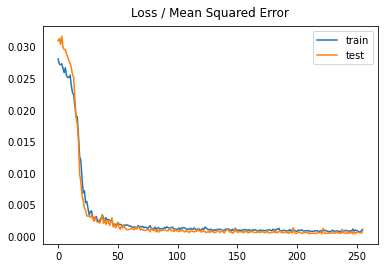

In [9]:
model, history = ARIMA_LSTM_model(data_train, order=order, epochs=epochs, timeStep=timeStep)

plot_history(history)

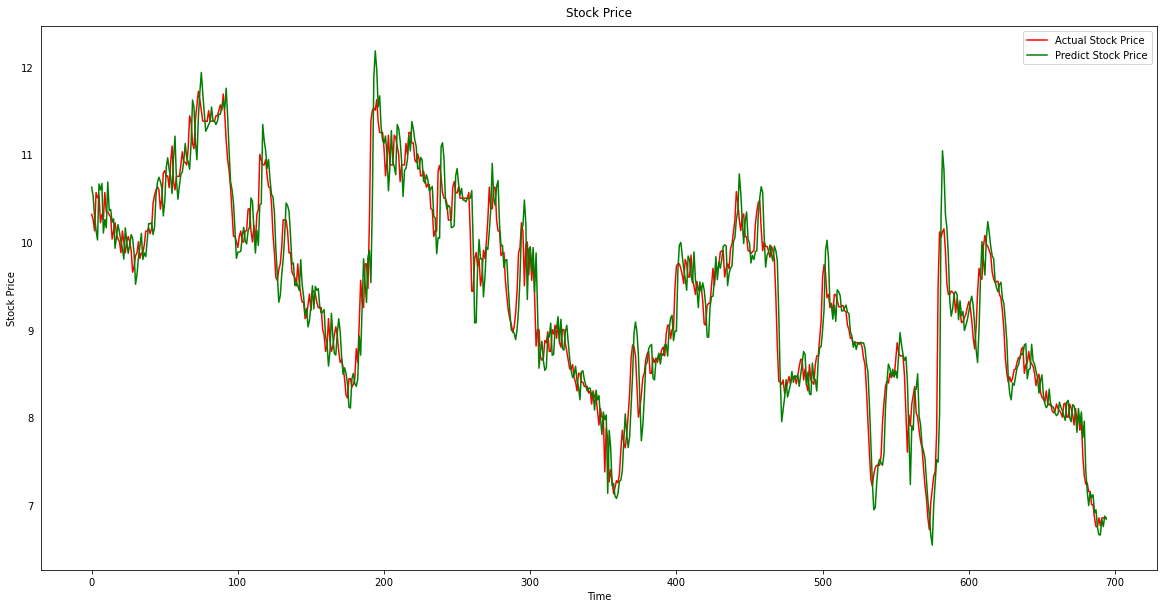

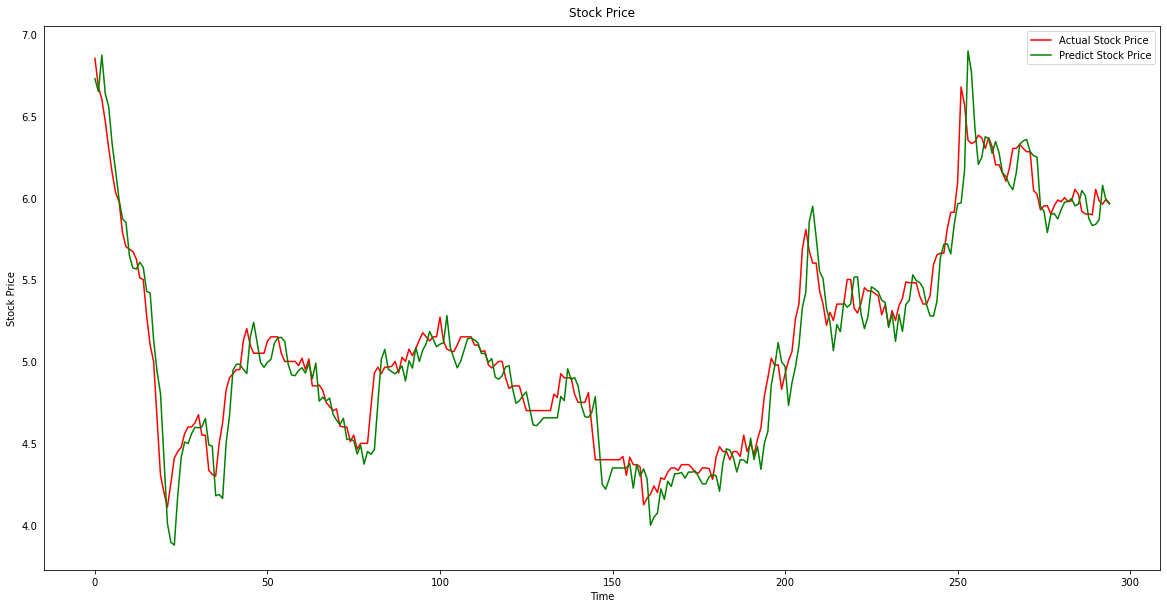

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 0.3149, 0.2245
RMSE_test, MAE_test = 0.1547, 0.1118

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5187
Precision  according to the trend: 0.6082
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5476
Precision  according to the trend: 0.673


In [10]:
y_train, y_train_pred = ARIMA_LSTM_predict(model, data_train,order=order, timeStep=timeStep)

y_test, y_test_pred = ARIMA_LSTM_predict(model, data_test, order=order, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)